Nour Mansour and Juan Estrella

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

Part 1: Data Collection

Step 1: Get the tsv data

In [2]:
# Data is saved in the same folder as the project. Then read data from tsv file
data = pd.read_csv("train-balanced-sarcasm.csv")
data.dropna(inplace=True)
data.drop(['author', 'score', 'ups', 'downs', 'date', 'created_utc', 'subreddit', 'parent_comment'], axis = 1, inplace = True)
data.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


Part 2: Data Processing

Step 1: Columns required: Label, Comments, subreddit, parent comment

Step 2: Create a Dataframe containing an even amount of sarcastic and non sarcastic 
comments, amount of data is 505413 each. 

In [3]:
#Copy the only the data we need
#required_data = data[['label','comment','subreddit','parent_comment']]
#required_data.head()
# Reset the indices after rows with NA values are dropped
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)
data.tail()

,label,comment
1010768,1,I'm sure that Iran and N. Korea have the techn...
1010769,1,"whatever you do, don't vote green!"
1010770,1,Perhaps this is an atheist conspiracy to make ...
1010771,1,The Slavs got their own country - it is called...
1010772,1,"values, as in capitalism .. there is good mone..."


In [4]:
#data.groupby('label').describe()

In [5]:
#rand_ind = np.random.choice(data.index, int(len(data)*10/100))
#len(rand_ind) # 101077 for 10%

#chosen_data = data.sample(frac=0.5, random_state=1)
#chosen_data.tail()



size = int(len(data)*2.5/100)# sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
chosen_data = data.groupby('label', as_index=False).apply(fn)
chosen_data.head()

label                                            comment
0 93532       0                                Cue the Mongoltage!
  797968      0                                    I don't get it.
  626142      0                        Time to pay the xmas gifts.
  993606      0  78INHUOESBG7EXWR9Q2998888aW'34WERQ34;A5SERTZAI...
  421618      0                      SAVE HIM RIOT #CatLivesMatter

In [6]:
chosen_data.reset_index(inplace = True)
chosen_data.drop(['level_0', 'level_1'], inplace = True, axis = 1)
chosen_data.head()

,label,comment
0,0,Cue the Mongoltage!
1,0,I don't get it.
2,0,Time to pay the xmas gifts.
3,0,78INHUOESBG7EXWR9Q2998888aW'34WERQ34;A5SERTZAI...
4,0,SAVE HIM RIOT #CatLivesMatter


Part 3: Exploratory Analysis & Data Visualization

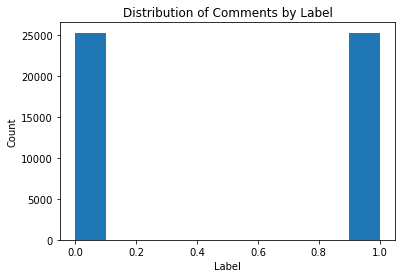

In [7]:
# Explore distribution of the data by label (0 -> non-sarcastic, 1 -> sarcastic)
plt.hist(chosen_data.label)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Comments by Label')
plt.show()

In [8]:
# Explore distribution of comments by label 
chosen_data.groupby('label').describe()

comment                            
        count unique             top freq
label                                    
0       25269  24240         Thanks!   21
1       25269  24307  You forgot the   77

In [9]:
#Import NLTK library
!pip install nltk

In [10]:
import nltk

In [11]:
#nltk.download("all")

In [11]:
from nltk.corpus import stopwords #Use this to get rid off meaningless words like "the, and, a"
from nltk.tokenize import word_tokenize #Split by word
from nltk.tokenize import sent_tokenize #Split by sentence

In [12]:
#Make sure all the comment column is str data type
chosen_data['comment'] = chosen_data['comment'].astype(str)
chosen_data['comment'] = chosen_data['comment'].astype(str)

#non_sarcastic = required_data.loc[required_data['label'] == 0]
#sarcastic = required_data.loc[required_data['label'] == 1]

#drop rows with na values on the comment column
#non_sarcastic['comment'].dropna(inplace=True)
#sarcastic['comment'].dropna(inplace=True)

#Make sure all the comment column is str data type
#non_sarcastic['comment'] = non_sarcastic['comment'].astype(str)
#sarcastic['comment'] = sarcastic['comment'].astype(str)
#print(len(non_sarcastic), len(sarcastic))

In [13]:
chosen_data['comment'] = chosen_data['comment'].apply(word_tokenize)
chosen_data['POS_tag'] = chosen_data['comment'].apply(nltk.pos_tag)
chosen_data.head()

,label,comment,POS_tag
0,0,"[Cue, the, Mongoltage, !]","[(Cue, NNP), (the, DT), (Mongoltage, NN), (!, .)]"
1,0,"[I, do, n't, get, it, .]","[(I, PRP), (do, VBP), (n't, RB), (get, VB), (i..."
2,0,"[Time, to, pay, the, xmas, gifts, .]","[(Time, NNP), (to, TO), (pay, VB), (the, DT), ..."
3,0,"[78INHUOESBG7EXWR9Q2998888aW'34WERQ34, ;, A5SE...","[(78INHUOESBG7EXWR9Q2998888aW'34WERQ34, CD), (..."
4,0,"[SAVE, HIM, RIOT, #, CatLivesMatter]","[(SAVE, NNP), (HIM, NNP), (RIOT, NNP), (#, #),..."


In [15]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

chosen_data['stem'] = chosen_data['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
chosen_data.head()

,label,comment,POS_tag,stem
0,0,"[Cue, the, Mongoltage, !]","[(Cue, NNP), (the, DT), (Mongoltage, NN), (!, .)]","[cue, the, mongoltag, !]"
1,0,"[I, do, n't, get, it, .]","[(I, PRP), (do, VBP), (n't, RB), (get, VB), (i...","[i, do, n't, get, it, .]"
2,0,"[Time, to, pay, the, xmas, gifts, .]","[(Time, NNP), (to, TO), (pay, VB), (the, DT), ...","[time, to, pay, the, xmas, gift, .]"
3,0,"[78INHUOESBG7EXWR9Q2998888aW'34WERQ34, ;, A5SE...","[(78INHUOESBG7EXWR9Q2998888aW'34WERQ34, CD), (...","[78inhuoesbg7exwr9q2998888aw'34werq34, ;, a5se..."
4,0,"[SAVE, HIM, RIOT, #, CatLivesMatter]","[(SAVE, NNP), (HIM, NNP), (RIOT, NNP), (#, #),...","[save, him, riot, #, catlivesmatt]"


In [72]:
#data_len = len(data)
#data1 = data.iloc[0:(int(data_len/4))].copy()
#data1.tail()

In [73]:
#data2 = data.iloc[(int(data_len/4)):(int(data_len/2))].copy()
#data2.tail()

In [74]:
#data3 = data.iloc[(int(data_len/2)):(int(3*data_len/4))].copy()
#data3.tail()

In [75]:
#data4 = data.iloc[(int(3*data_len/4)):].copy()
#data4.tail()

In [76]:
# data4['comment'] = data4['comment'].apply(word_tokenize)
# data4.head()

In [77]:
# data4['POS_tag'] = data4['comment'].apply(nltk.pos_tag)
# data4.head()

In [78]:
# data4['stem'] = data4['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data4.head()

In [79]:
# data3['comment'] = data3['comment'].apply(word_tokenize)
# data3['POS_tag'] = data3['comment'].apply(nltk.pos_tag)
# data3['stem'] = data3['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data3.head()

In [80]:
# data2['comment'] = data2['comment'].apply(word_tokenize)
# data2['POS_tag'] = data2['comment'].apply(nltk.pos_tag)
# data2['stem'] = data2['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data2.head()

In [81]:
# data1['comment'] = data1['comment'].apply(word_tokenize)
# data1['POS_tag'] = data1['comment'].apply(nltk.pos_tag)
# data1['stem'] = data1['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data1.head()

In [82]:
#Divide the required data set in half to ease later comment transformations
# df1 = data.iloc[0:(int(len(data)/2))].copy()
# df1.tail()

In [83]:
# df2 = data.iloc[(int(len(data)/2)):].copy()
# df2.tail()

In [17]:
#df1['tokenized_by_sent'] = df1['comment'].apply(sent_tokenize)
#df2['tokenized_by_sent'] = df2['comment'].apply(sent_tokenize)

#data['tokenized_by_sent'] = data['comment'].apply(sent_tokenize)
#data['tokenized_by_word'] = data['comment'].apply(word_tokenize)
#word = word_tokenize(sarcastic['comment'].iloc[56269])
#word
#note to nour, so when i try to do the first line of code it shows that index 56269 has an error but when i try to 
#individually tokenized that index, it works. Not sure how to fix this.

# note to Juan: Fixed by making dropna function is working correctly

In [84]:
# Tokenize by word first half

# df1['comment'] = df1['comment'].apply(word_tokenize)
# df1.head()

In [85]:
# Tokenize by word second half

# df2['comment'] = df2['comment'].apply(word_tokenize)
# df2.head()

In [86]:
# Parts of Speech tagging first half

# df1['POS_tag'] = df1['comment'].apply(nltk.pos_tag)
# df1.head()

#data['POS_tag'] = data['tokenized_by_word'].apply(nltk.pos_tag)
#nltk.pos_tag(data.iloc[0, 5])
#entities = nltk.chunk.ne_chunk( nltk.pos_tag(data.iloc[1, 5]))
#entities.draw()

In [87]:
# Parts of Speech tagging second half

# df2['POS_tag'] = df2['comment'].apply(nltk.pos_tag)
# df2.head()

In [88]:
#data.head()
# df1_len = len(df1)
# df2_len = len(df2)
# df14 = df1.iloc[0:int(df1_len/2)].copy()
# df24 = df1.iloc[(int(df1_len/2)):].copy()
# df34 = df2.iloc[0:int(df2_len/2)].copy()
# df44 = df2.iloc[(int(df2_len/2)):].copy()

In [89]:
# Stemming
#from nltk.stem import PorterStemmer

#data['stem'] = data['tokenized_by_word'].apply(lambda x: [PorterStemmer.stem(y) for y in x])

# from nltk.stem.snowball import SnowballStemmer

# stemmer = SnowballStemmer("english")

# df14['stem'] = df14['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df14.head()

In [90]:
# df24['stem'] = df24['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df24.head()
#df2['stem'] = df2['tokenized_by_word'].apply(lambda x: [stemmer.stem(y) for y in x])
#df2.head()

In [91]:
# df34['stem'] = df34['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df34.head()

In [92]:
# df44['stem'] = df44['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df44.head()

In [93]:
#from nltk.stem import WordNetLemmatizer
#data['lemma'] = data['tokenized_by_word'].apply(WordNetLemmatizer)
# df14.append(df24.append(df34.append(df44)))
# df14.tail()

### Predicting Sarcasm

We were interested in trying different models for predicting a sarcastic comment.
To determine the features and labels for the analysis, we decided to look at the comment itself as a feature and use the given sarcastic vs non-sarcastic classification as our label.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Determine the features and labels for the models
features = chosen_data['stem'].apply(lambda x: ' '.join(x))
labels = chosen_data['label']

In [20]:
#list(features)

In [26]:
# TF-IDF to vectorize the data

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 5000) # ask about max features
features = list(features)
X = vectorizer.fit_transform(features)

In [28]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '05', '10', '100', '1000', '1050', '1060', '1070', '1080', '1080p', '11', '110', '12', '1200', '13', '14', '15', '150', '16', '17', '18', '19', '1m', '1st', '1v1', '20', '200', '2000', '2006', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '20th', '21', '22', '23', '24', '24fps', '25', '250', '26', '27', '28', '29', '2k', '2nd', '30', '300', '30fps', '32', '34', '35', '350', '36', '360', '37', '38', '390', '3d', '3rd', '40', '400', '42', '420', '45', '46', '47', '48', '480', '4chan', '4k', '4th', '50', '500', '5000', '51', '55', '5th', '60', '600', '60fps', '64', '65', '68', '6th', '70', '700', '720p', '75', '76', '80', '85', '8k', '90', '90s', '95', '98', '99', '9mm', 'aaa', 'ab', 'abandon', 'abil', 'abl', 'abomin', 'abort', 'about', 'abov', 'absolut', 'abus', 'ac', 'academ', 'acc', 'acceler', 'accent', 'accept', 'access', 'accid', 'accident', 'accomplish', 'accord', 'account', 'accur', 'accuraci', 'accus', 'ace', 'achiev', 'acid'

In [29]:
print(X)

  (0, 1118)	0.9749175528048084
  (0, 4426)	0.22256631648361289
  (1, 1335)	0.587158379305765
  (1, 1908)	0.6715151012584202
  (1, 2365)	0.45200940962873903
  (2, 4426)	0.18466602046948202
  (2, 4491)	0.40527348070295577
  (2, 4504)	0.2182064235747865
  (2, 3211)	0.5185339876057211
  (2, 1915)	0.6965345125198656
  (4, 3820)	0.5785475258454794
  (4, 2135)	0.4403503778381063
  (4, 3715)	0.6865670433948249
  (5, 3097)	0.2887460211906708
  (5, 2852)	0.6215403263892236
  (5, 4113)	0.5016180987095661
  (5, 2036)	0.5279134786738582
  (6, 4986)	0.20803166691344466
  (6, 2917)	0.4290559987442354
  (6, 3015)	0.2790808408281773
  (6, 2473)	0.3329133590209619
  (6, 2692)	0.4547973315464493
  (6, 4931)	0.6140649333653949
  (7, 4504)	0.13523204956435575
  (7, 2079)	0.18748674094697748
  :	:
  (50536, 265)	0.11444065110559308
  (50536, 3961)	0.28145085603
  (50536, 2433)	0.2990047537561897
  (50536, 3067)	0.11905892612667972
  (50536, 1867)	0.19098317343999585
  (50536, 2741)	0.2070927268636411
  (505

In [ ]:
# Split data into Training and Test data
# Also cross-validation data?

In [ ]:
# Logistic Regression